In [45]:
import pandas as pd
import language_tool_python

In [46]:
data = pd.read_csv('./train.csv')

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(data, data, test_size = 0.3,random_state=50)


In [48]:
def grammarcheck(df):
    tool = language_tool_python.LanguageTool('en-US')
    counts = {'counts':{},'score':{}}
    rules = {}
    for i in df.index:
        matches = tool.check(df['full_text'][i])
        counts['counts'][i] = len(matches)
        counts['score'][i] = (str(df['grammar'][i]))
        rules[i] = {}
        for m in matches:
            if m.ruleId in rules[i].keys():
                rules[i][m.ruleId] += 1
            else:
                rules[i][m.ruleId] = 1
    return counts, rules

In [49]:

def getAvg(counts):
    sums = {"1.0":0,
    "1.5":0,
    "2.0":0,
    "2.5":0,
    "3.0":0,
    "3.5":0,
    "4.0":0,
    "4.5":0,
    "5.0":0}
    n = {"1.0":0,
    "1.5":0,
    "2.0":0,
    "2.5":0,
    "3.0":0,
    "3.5":0,
    "4.0":0,
    "4.5":0,
    "5.0":0}
    avg = {}
    for i in counts['counts'].keys():
        sums[counts['score'][i]] += counts['counts'][i]
        n[counts['score'][i]] += 1
        
    for sum in sums.keys():
        avg[sum] = (sums[sum])/(n[sum])
    return avg

In [50]:

def getMost(counts):
    sums = {"1.0":[],
    "1.5":[],
    "2.0":[],
    "2.5":[],
    "3.0":[],
    "3.5":[],
    "4.0":[],
    "4.5":[],
    "5.0":[]}
    n = {"1.0":0,
    "1.5":0,
    "2.0":0,
    "2.5":0,
    "3.0":0,
    "3.5":0,
    "4.0":0,
    "4.5":0,
    "5.0":0}
    avg = {}
    for i in counts['counts'].keys():
        sums[counts['score'][i]].append(counts['counts'][i])
            
        
    
    return sums

In [51]:
counts,rules = grammarcheck(x_train)


In [52]:
rules

{38: {'MORFOLOGIK_RULE_EN_US': 3,
  'I_LOWERCASE': 1,
  'EN_A_VS_AN': 1,
  'COMMA_COMPOUND_SENTENCE': 2,
  'COMMA_COMPOUND_SENTENCE_2': 1,
  'NUMEROUS_DIFFERENT': 1,
  'HAND_COMPOUNDS': 1,
  'LIFE_CHANGING_HYPHEN': 1,
  'ENGLISH_WORD_REPEAT_BEGINNING_RULE': 1},
 909: {'WHETHER': 1,
  'PHRASE_REPETITION': 1,
  'EN_CONTRACTION_SPELLING': 1,
  'I_LOWERCASE': 1,
  'POSSESSIVE_APOSTROPHE': 1,
  'SOMETIME_SOMETIMES': 1},
 639: {'IT_VBZ': 1,
  'COMMA_PARENTHESIS_WHITESPACE': 6,
  'DIFFERENT_THAN': 2,
  'PRP_VBG': 1,
  'DT_DT': 1,
  'MORFOLOGIK_RULE_EN_US': 5,
  'HAVE_PART_AGREEMENT': 1,
  'THE_SAME_AS': 1,
  'EVERY_BODY': 1,
  'LOT_OF': 1},
 1073: {'USE_TO_VERB': 1,
  'COMMA_COMPOUND_SENTENCE': 2,
  'POSSESSIVE_APOSTROPHE': 1,
  'ENGLISH_WORD_REPEAT_BEGINNING_RULE': 1,
  'EN_COMPOUNDS': 1,
  'COMMA_PARENTHESIS_WHITESPACE': 1,
  'IT_IS': 1,
  'EN_CONTRACTION_SPELLING': 1,
  'WHITESPACE_RULE': 1},
 2322: {'COMMA_PARENTHESIS_WHITESPACE': 1,
  'MORFOLOGIK_RULE_EN_US': 9,
  'OTHER_OTHERS': 1,
  'M

In [53]:

avg = getAvg(counts)

In [54]:
def grammarScoring(avg, test):
    gScores = {}
    testCount,rules = grammarcheck(test)
    
    for ind in testCount['counts'].keys():
        val = testCount['counts'][ind]
        if val <= avg["5.0"]:
            gScores[ind] = 5.0
        elif val > avg["5.0"] and  val <= avg["4.5"]:
            gScores[ind] = 4.5
        elif val > avg["4.5"] and  val <= avg["4.0"]:
            gScores[ind] = 4.0
        elif val > avg["4.0"] and  val <= avg["3.5"]:
            gScores[ind] = 3.5
        elif val > avg["3.5"] and  val <= avg["3.0"]:
            gScores[ind] = 3.0
        elif val > avg["3.0"] and  val <= avg["2.5"]:
            gScores[ind] =2.5
        elif val > avg["2.5"] and  val <= avg["2.0"]:
            gScores[ind] =2.0
        elif val > avg["2.0"] and  val <= avg["1.5"]:
            gScores[ind] =1.5
        else:
            gScores[ind] = 1.0
        

    return gScores

In [55]:
def score_split(scores):
    keys = []
    val = []
    for k in scores.keys():
        keys.append(k)
        val.append(scores[k])
    return keys, val

In [56]:
train_gscores = grammarScoring(avg, x_train)
test_gscores = grammarScoring(avg, x_test)

In [57]:
avg

{'1.0': 69.0,
 '1.5': 43.666666666666664,
 '2.0': 33.08831168831169,
 '2.5': 26.476112026359143,
 '3.0': 22.077474892395983,
 '3.5': 18.275290215588722,
 '4.0': 14.759197324414716,
 '4.5': 11.36,
 '5.0': 12.48}

In [58]:
sum = getMost(counts)

In [59]:
from statistics import mode
mode(sum['5.0'])
print(sum["5.0"])

[3, 14, 5, 5, 8, 11, 7, 8, 10, 27, 9, 4, 3, 4, 110, 3, 8, 14, 5, 16, 8, 8, 10, 6, 6]


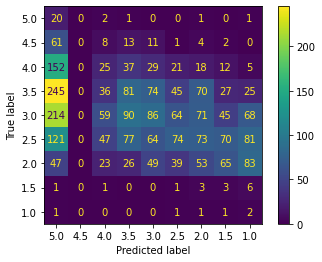

0.12568505663134819


In [60]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
key, val = score_split(train_gscores)
res = pd.Series(train_gscores)
res = res.astype("string")
tru = x_train["grammar"].astype("string")
label=["5.0", "4.5", "4.0","3.5","3.0","2.5","2.0","1.5","1.0"]
confusion_matrix = metrics.confusion_matrix(tru, res,labels=label)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = label)

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(tru, res)
print(Accuracy)


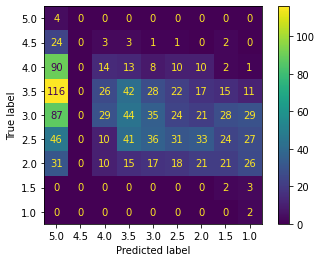

0.12862010221465076


In [61]:
res = pd.Series(test_gscores)
res = res.astype("string")
tru = x_test["grammar"].astype("string")
confusion_matrix = metrics.confusion_matrix(tru, res,labels=label)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = label)

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(tru, res)
print(Accuracy)


In [62]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
train = pd.Series(counts["counts"])
train = train.astype("string")
train = train.to_numpy()
train = train.reshape(-1, 1)
ty = pd.Series(counts["score"])
ty = ty.astype("string")

tc,rules = grammarcheck(x_test)
test =  pd.Series(tc["counts"])
test = test.astype("string")
test = test.to_numpy()
test = test.reshape(-1, 1)
gnb = GaussianNB()
y_pred = gnb.fit(train, ty).predict(test)



In [ ]:
y_pred

array(['3.5', '3.5', '3.5', ..., '3.0', '3.0', '2.5'], dtype='<U3')

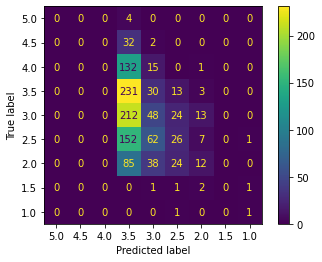

0.2708688245315162


In [ ]:
tru = x_test["grammar"].astype("string")
confusion_matrix = metrics.confusion_matrix(tru, y_pred,labels=label)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = label)

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(tru, y_pred)
print(Accuracy)
#rint(gnb.score())


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf = SVC(gamma='auto')
clf.fit(train, ty)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
pre_y = clf.predict(test)

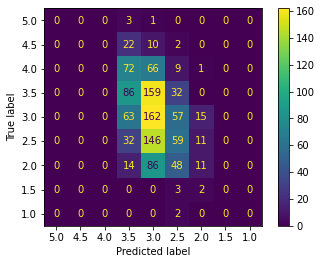

0.2708688245315162


In [ ]:
confusion_matrix = metrics.confusion_matrix(tru, pre_y,labels=label)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = label)

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(tru, pre_y)
print(Accuracy)